In [58]:
import numpy    as np
from numpy.testing._private.utils import decorate_methods
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import time

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from xgboost               import XGBRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor

In [12]:
#os.getcwd()

'c:\\Users\\harsh\\Documents\\GitHub\\AI-Exercises\\Chapter 2\\11. Data Enhancement'

In [59]:
path = 'data\london_merged.csv'
def get_dataframe(path):
    data = pd.read_csv(path)
    # Splitting timestamp feature into three features 
    data['year'] = data['timestamp'].apply(lambda row: row[:4])
    data['month'] = data['timestamp'].apply(lambda row: row.split('-')[2][:2] )
    data['hour'] = data['timestamp'].apply(lambda row: row.split(':')[0][-2:] )
    data.drop('timestamp', axis=1, inplace=True)

    return data

In [60]:
data = get_dataframe(path)
data
 

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,04,00
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,04,01
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,04,02
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,04,03
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,04,04
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,03,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,03,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,03,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,03,22


In [61]:
def data_enhancement(data):
    gen_data = data
    for season in data['season'].unique():
        seasonal_data =  gen_data[gen_data['season'] == season]
        hum_std = seasonal_data['hum'].std()
        wind_speed_std = seasonal_data['wind_speed'].std()
        t1_std = seasonal_data['t1'].std()
        t2_std = seasonal_data['t2'].std()
        
        for i in gen_data[gen_data['season'] == season].index:
            if np.random.randint(2) == 1:
                gen_data['hum'].values[i] += hum_std/10
            else:
                gen_data['hum'].values[i] -= hum_std/10
                
            if np.random.randint(2) == 1:
                gen_data['wind_speed'].values[i] += wind_speed_std/10
            else:
                gen_data['wind_speed'].values[i] -= wind_speed_std/10
                
            if np.random.randint(2) == 1:
                gen_data['t1'].values[i] += t1_std/10
            else:
                gen_data['t1'].values[i] -= t1_std/10
                
            if np.random.randint(2) == 1:
                gen_data['t2'].values[i] += t2_std/10
            else:
                gen_data['t2'].values[i] -= t2_std/10

    return gen_data

In [62]:
print(data.head(3))
gen = data_enhancement(data)
print(gen.head(3))

   cnt   t1   t2   hum  wind_speed  weather_code  is_holiday  is_weekend  \
0  182  3.0  2.0  93.0         6.0           3.0         0.0         1.0   
1  138  3.0  2.5  93.0         5.0           1.0         0.0         1.0   
2  134  2.5  2.5  96.5         0.0           1.0         0.0         1.0   

   season  year month hour  
0     3.0  2015    04   00  
1     3.0  2015    04   01  
2     3.0  2015    04   02  
   cnt        t1       t2        hum  wind_speed  weather_code  is_holiday  \
0  182  2.620628  2.48831  94.089517    5.109105           3.0         0.0   
1  138  2.620628  2.98831  91.910483    5.890895           1.0         0.0   
2  134  2.879372  2.01169  95.410483    0.890895           1.0         0.0   

   is_weekend  season  year month hour  
0         1.0     3.0  2015    04   00  
1         1.0     3.0  2015    04   01  
2         1.0     3.0  2015    04   02  


In [63]:
# Splitting data
X = data.iloc[:,1:]
y = data.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)# Recommended for reproducibility
print(x_train.shape)
# Creating 25% of extra data for better results
extra_sample = gen.sample(gen.shape[0] // 4)
#concating main data and extra_sample
x_train = pd.concat([x_train, extra_sample.drop(['cnt'], axis=1)])
y_train = pd.concat([y_train, extra_sample['cnt']])

# transforming data
transformer = preprocessing.MinMaxScaler()
y_train = transformer.fit_transform(y_train.values.reshape(-1,1))
y_test = transformer.transform(y_test.values.reshape(-1,1))


(13931, 11)


In [64]:
x_train

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
4493,25.638042,25.362627,23.487086,17.326615,1.0,0.0,0.0,1.0,2015,10,16
14407,16.861958,16.862627,67.512914,4.326615,1.0,0.0,0.0,1.0,2016,30,02
7862,10.570700,11.506144,70.778727,27.764155,7.0,0.0,1.0,2.0,2015,29,06
2627,11.901738,10.989901,67.977094,17.788771,1.0,0.0,0.0,0.0,2015,23,19
1764,9.401738,5.489901,67.522906,18.788771,2.0,0.0,0.0,0.0,2015,18,14
...,...,...,...,...,...,...,...,...,...,...,...
3199,17.901738,16.989901,41.022906,22.788771,1.0,0.0,1.0,0.0,2015,17,15
10386,5.401738,2.510099,82.477094,14.788771,4.0,0.0,1.0,0.0,2016,13,23
1471,8.901738,6.010099,62.477094,20.288771,3.0,0.0,0.0,0.0,2015,06,09
2485,9.098262,5.989901,75.022906,19.211229,2.0,0.0,0.0,0.0,2015,17,21


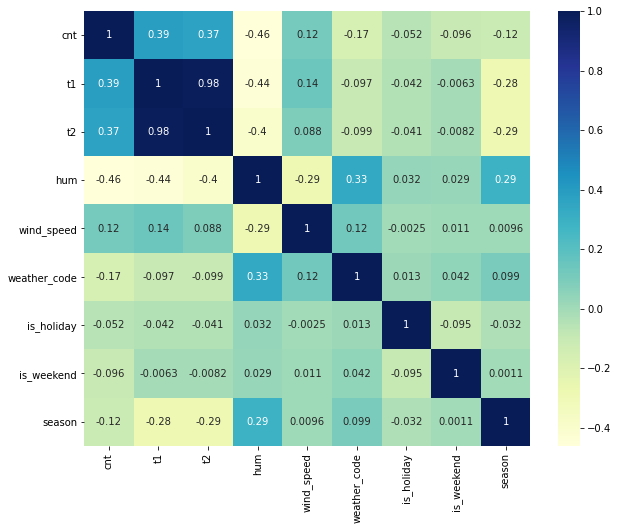

In [65]:
import seaborn as sns
#Checking the correlation for all features
corr = data.corr()
corr_features = corr.index
plt.figure(figsize=(10,8))
fig = sns.heatmap(data[corr_features].corr(), annot=True, cmap="YlGnBu")

In [66]:
x_train['t1t2'] = x_train['t1']*x_train['t2']
x_test['t1t2'] = x_test['t1']*x_test['t2']
x_train.shape

C:\Users\harsh\AppData\Local\Temp/ipykernel_8060/4055671370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['t1t2'] = x_test['t1']*x_test['t2']


(18284, 12)

In [57]:
# from sklearn.feature_selection import SelectKBest, f_regression
# X_new = SelectKBest(f_regression, k=6).fit_transform(x_train, y_train.flatten())
# X_new

In [67]:
#Categorical data
cat_vars = ['season','is_weekend','is_holiday','year','month','weather_code']
#Numerical data
num_vars = ['t1','t2','hum','wind_speed']

num_4_treeModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value=-9999)),
])

cat_4_treeModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', preprocessing.OrdinalEncoder()) # handle_unknown='ignore' ONLY IN VERSION 0.24
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_treeModels, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

In [68]:
# Classifiers  
tree_classifiers = {
  "Decision Tree": DecisionTreeRegressor(),
  "Extra Trees":   ExtraTreesRegressor(n_estimators=100),
  "Random Forest": RandomForestRegressor(n_estimators=100),
  "AdaBoost":      AdaBoostRegressor(n_estimators=100),
  "Skl GBM":       GradientBoostingRegressor(n_estimators=100),
  "XGBoost":       XGBRegressor(n_estimators=100),
  "LightGBM":      LGBMRegressor(n_estimators=100),
  "CatBoost":      CatBoostRegressor(n_estimators=100),
}

tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}


In [69]:
def get_scores(model, train_x, train_y, test_x, y_predict):
    results = []
    for name, model in model.items():
        start_time = time.time()
        model.fit(train_x, train_y.ravel())
        total_time = time.time() - start_time
        prediction = model.predict(test_x)
        results.append({
            'ModelName': name,
            'MSE': metrics.mean_squared_error(prediction, y_predict),
            'MAE': metrics.mean_absolute_error(prediction, y_predict),
            'Time': total_time})
    return pd.DataFrame(results)

get_scores(tree_classifiers,x_train, y_train, x_test, y_test)

Learning rate set to 0.421295
0:	learn: 0.1254128	total: 1.07s	remaining: 1m 45s
1:	learn: 0.1201287	total: 1.08s	remaining: 52.9s
2:	learn: 0.1162448	total: 1.09s	remaining: 35.2s
3:	learn: 0.1146295	total: 1.1s	remaining: 26.4s
4:	learn: 0.1137236	total: 1.11s	remaining: 21s
5:	learn: 0.1130410	total: 1.11s	remaining: 17.5s
6:	learn: 0.1126137	total: 1.13s	remaining: 14.9s
7:	learn: 0.1123897	total: 1.13s	remaining: 13s
8:	learn: 0.1121640	total: 1.14s	remaining: 11.5s
9:	learn: 0.1119746	total: 1.15s	remaining: 10.3s
10:	learn: 0.1117374	total: 1.16s	remaining: 9.37s
11:	learn: 0.1114471	total: 1.16s	remaining: 8.54s
12:	learn: 0.1111940	total: 1.17s	remaining: 7.86s
13:	learn: 0.1110387	total: 1.18s	remaining: 7.26s
14:	learn: 0.1108343	total: 1.19s	remaining: 6.75s
15:	learn: 0.1106966	total: 1.2s	remaining: 6.29s
16:	learn: 0.1103911	total: 1.21s	remaining: 5.9s
17:	learn: 0.1102745	total: 1.22s	remaining: 5.54s
18:	learn: 0.1101702	total: 1.23s	remaining: 5.23s
19:	learn: 0.1099

,ModelName,MSE,MAE,Time
0,Decision Tree,0.017878,0.076500,0.856394
1,Extra Trees,0.009754,0.059282,6.202539
2,Random Forest,0.010195,0.067591,9.992970
3,AdaBoost,0.024517,0.135917,1.696686
4,Skl GBM,0.012875,0.082163,2.863295
5,XGBoost,0.012161,0.078229,3.064400
6,LightGBM,0.012156,0.079278,1.853784
7,CatBoost,0.012462,0.079788,19.448077
